# Random Number Generator example

This example investigates random number generation. You will see how to generate and display images in a Jupyter notebook using the PIL module. 

A random number generator should produce evenly distributed random numbers. An array of numbers will be generated randomly and displayed graphically to investigate their randomness. 

## 1. Bad RNG
The first RNG is a bad RNG. It contains a lot of common errors that reduce the randomness of the numbers generated:

1. Use of "%" operation results in unequal probability of random numbers.
2. Simple linear algebra leads to predictable results.
3. Use of the same seed leads to the same pattern.

Reference:

https://www.random.org/

http://hasard.readthedocs.org/en/latest/common_errors.html

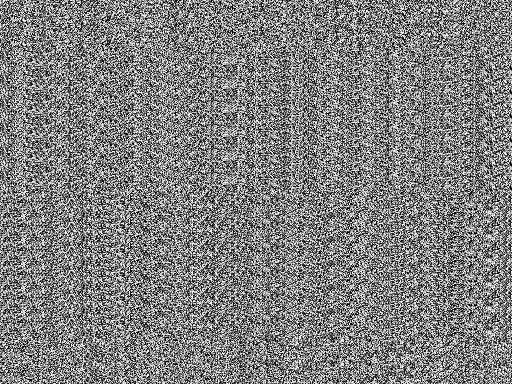

In [1]:
from PIL import Image
from time import time

rand_seed = int(time())
def rng():
    """Return a pseudo-random number between 0 to 8388593.""" 
    global rand_seed
    # For these choice of numbers, see P L'Ecuyer, 
    # "Tables of linear congruential generators of different sizes 
    # and good lattice structure"
    rand_seed = (rand_seed * 653276) % 8388593
    return rand_seed

rgb = bytearray()
for i in range(512*384):
    if i%(128*96)==0:
        # Use similar seeds
        rand_seed = int(time())
    gray = rng()%256
    rgb.extend([gray,gray,gray])

image = Image.frombytes('RGB', (512,384), bytes(rgb))
image.save("/home/xilinx/jupyter_notebooks/Examples/data/random_1.jpg", 'JPEG')
image

The regular patterns in the image above indicate that the random numbers are not evenly distributed.

## 2. A better one...
The second RNG is much better than the first one, although this would still not be sufficiently random for security protection.

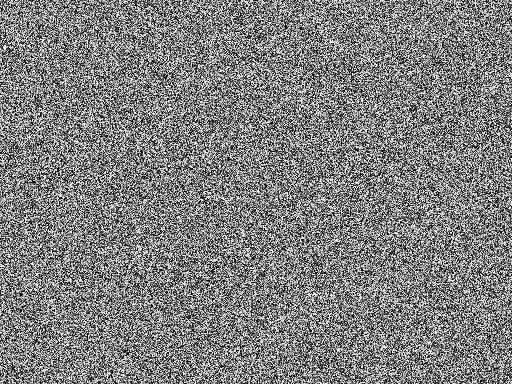

In [2]:
from PIL import Image
from random import randint

rgb = bytearray()
for i in range(512*384):
    gray = randint(0, 255)
    rgb.extend([gray,gray,gray])

image = Image.frombytes('RGB', (512,384), bytes(rgb))
image.save("/home/xilinx/jupyter_notebooks/Examples/data/random_2.jpg", 'JPEG')
image